In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
import datetime
import time

In [3]:
path = "/work/bb1070/b381019/Output/Output_1911/inwp_gscp4/aci_cold6/"
dataname = "icon-art-LAM-THUNDER-aero_DOM01_ML_*"
data = xr.open_mfdataset(path + dataname)

In [4]:
#make vertical slice over time
def make_slice_time(data,height,gridpoint,var,start_t=0,end_t=1):
    """
    Arguments:
        data,height,gridpoint,start_t end_t
        gets plotable datapoints for the vertical slice from the whole Dataset
    
    """
    height_level_max=30
    y_axis=height.isel(height_3=slice(-height_level_max-1,-1),ncells=np.array(gridpoint,dtype=int),time=range(start_t,end_t))["z_ifc"].values.flatten()
    ground=height.isel(height_3=-1,ncells=np.array(gridpoint,dtype=int),time=start_t)["z_ifc"].values
    dust = np.rot90(data.isel(height=slice(-height_level_max-1,-1),ncells=np.array(gridpoint,dtype=int),time=range(start_t,end_t))[var].values).flatten()

    timesteps = range(start_t,end_t)
    timesteps_expanded = np.repeat(timesteps,height_level_max)

    return timesteps_expanded ,y_axis, dust, timesteps, ground

In [5]:
timesteps_expanded ,y_axis, pollbetu, timesteps, ground=make_slice_time(data,data,15023,"pollbetu",0,24)
timesteps_expanded ,y_axis, spp_pollbetu, timesteps, ground=make_slice_time(data,data,15023,"spp_pollbetu",0,24)      

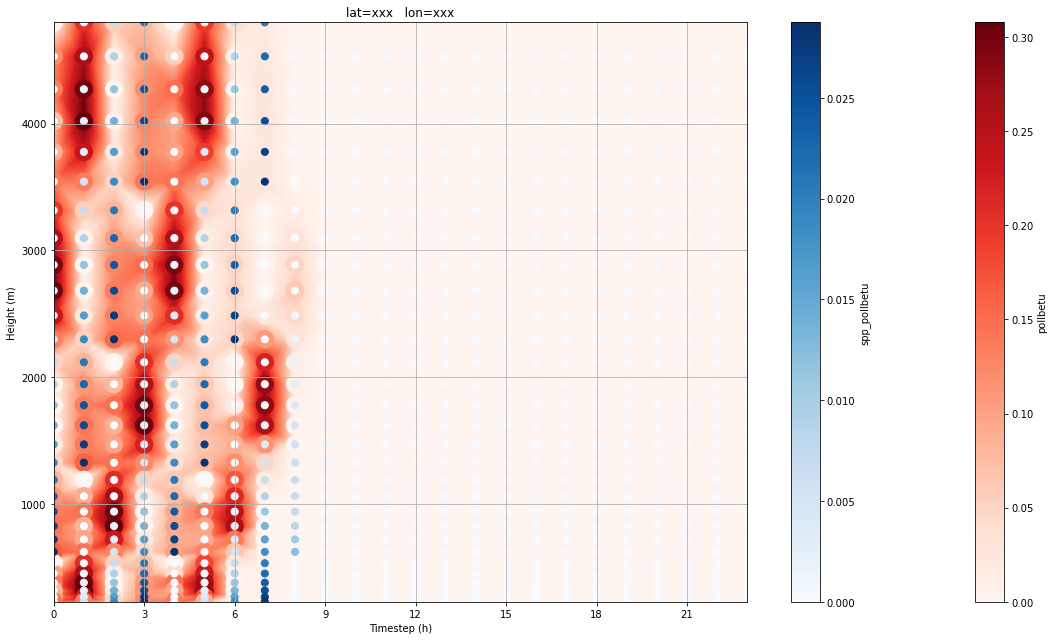

In [11]:
#Make A scatter Plot of 2 Concentrations, e.g. pollen and fractured pollen
timesteps_expanded ,y_axis, pollbetu, timesteps, ground=make_slice_time(data,data,15023,"pollbetu",0,24)
timesteps_expanded ,y_axis, spp_pollbetu, timesteps, ground=make_slice_time(data,data,15023,"spp_pollbetu",0,24) 

plt.figure(figsize=(16,9),facecolor='white')
plt.grid()
plt.tricontourf(timesteps_expanded,y_axis,pollbetu,cmap="Reds",levels=1000)
cmap1=plt.scatter(timesteps_expanded,y_axis,marker="o",s=300,c=pollbetu,cmap="Reds")
plt.colorbar(cmap1,label="pollbetu")
cmap2=plt.scatter(timesteps_expanded,y_axis,marker="o",s=50,c=spp_pollbetu,cmap="Blues")
plt.colorbar(cmap2,label='spp_pollbetu')
plt.ylabel("Height (m)")
plt.xlabel("Timestep (h)")
plt.xticks(timesteps[::3])
plt.yticks()
plt.title('lat=xxx   lon=xxx')
plt.tight_layout()
#plt.savefig("/path/name.png")

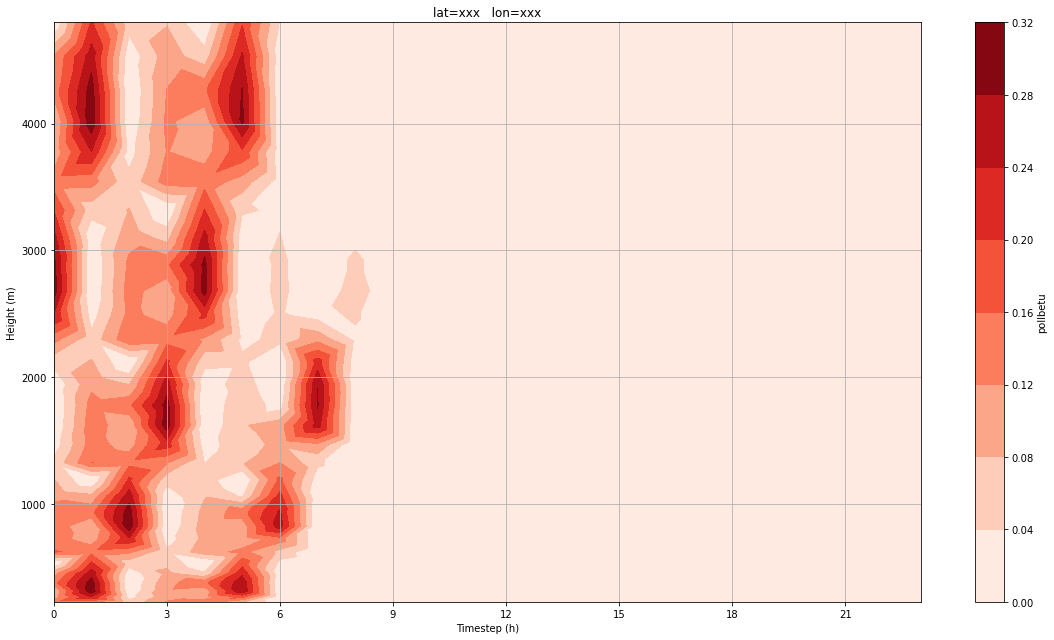

In [20]:
#make a contour plot of a single concentration
plt.figure(figsize=(16,9),facecolor='white')
plt.grid()
cmap1=plt.tricontourf(timesteps_expanded,y_axis,pollbetu,cmap="Reds")
plt.colorbar(cmap1,label="pollbetu")
plt.ylabel("Height (m)")
plt.xlabel("Timestep (h)")
plt.xticks(timesteps[::3])
plt.yticks()
plt.title('lat=xxx   lon=xxx')
plt.tight_layout()
#plt.savefig("/path/name.png")